BUSINESS UNDERSTANDING

1.1 INTRODUCTION

Currently about 1% of all devices that can be connected to the internet are already connected which include computers, smartphones and IoT(Internet of Things) and as more devices continue to be connected it brings about drawbacks such as cyber attacks.
According to wikipedia a cyberattack is any attempt by an individual or organization using one or more computers and computer systems to steal, expose, change, disable or eliminate information, or to breach computer information systems, computer networks and computer infrastructures
Cybercrime refers to illegal activities carried out using computers, networks or the internet
The global cost of cybercrime is forecasted to jump to $23.84 trillion by 2027. Up from $8.44 trillion in 2022, according to estimates by Statista.
This estimate shows that there will be an increase in losses for businesses due to cyber attacks

Definitions:
A. Cyber weapons: These are malicious tools such as malware, ransomware, rootkits that are used to conduct cyberattacks
B. Rootkits: Are malicious programs designed to enable access to a computer and masks the presence of malicious programs including its self
C. Vulnerability: Weakness in software or hardware that can be exploited by cyber attackers 
D. IP address: Unique identifier assigned to each device connected to a network that uses the Internet Protocol for communication
E. Intrusion Detection Systems (IDS) or Intrusion Prevention Systems (IPS): systems that monitor and detect malicious activity within a network or system


Dataset column definition
A. Malware Indicators: Indicate if malware was detected 
B. Alerts/Warning: Show if alerts were triggered 
C. Proxy Information: Gives the public IP address of the proxy server used
D. Firewall Logs: Logs generated by firewall devices indicating allowed or blocked traffic
E. IDS/IPS Alerts: Show if IDS have detected any alerts

1.2 PROJECT OVERVIEW

To be able to use algorithms to indentify potential cyber weapons, areas with high attack risks and potential vulnerabilities in your devices, will assist to reduce the damage caused by cyberattacks

1.3 BUSINESS PROBLEM

To reduce damages caused by cyberattacks we need to:
A. Identify and gauge severity of cyber weapons in use 
B. Identify areas with high attack rates 
C. Identify vulnerabilities in our devices

1.4 OBJECTIVES
A. Use EDA to understand the data 
B. Map areas with high attack rates
C. Identify most used cyber weapons



1.5 STAKEHOLDERS

A. Stock investors
B. Data scientists and analysts involved in the project
C. Technology vendors 









2 DATA PREPARATION
2.1 IMPORTING LIBRARIES

In [1]:
#import all libraries
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

2.2 LOADING DATASETS

In [2]:
cyber_df = pd.read_csv('cyber.csv')
cyber_df.head() #display first 5 rows and their column headers


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


3 DATA UNDERSTANDING
3.1 ANALYZING THE DATASET

In [3]:
#check info of the dataset
cyber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

The cyber dataframe has 25 columns with 1 column containing floats, 3 columns containing integers and 21 columns containing objects which are non numbered values

In [4]:
#check the total entries in each column
cyber_df.count()

Timestamp                 40000
Source IP Address         40000
Destination IP Address    40000
Source Port               40000
Destination Port          40000
Protocol                  40000
Packet Length             40000
Packet Type               40000
Traffic Type              40000
Payload Data              40000
Malware Indicators        20000
Anomaly Scores            40000
Alerts/Warnings           19933
Attack Type               40000
Attack Signature          40000
Action Taken              40000
Severity Level            40000
User Information          40000
Device Information        40000
Network Segment           40000
Geo-location Data         40000
Proxy Information         20149
Firewall Logs             20039
IDS/IPS Alerts            19950
Log Source                40000
dtype: int64

According to the results the highest number of non- null values in a single column is 40000 while the least is 19933

In [5]:
cyber_series = cyber_df.count()
ls =[]
for x in cyber_series.index:
    if cyber_series[x] != 40000:
        ls.append(x)

The ls list stores the column names with values less that 40000 which indicates missing values

In [21]:
cyber_df.shape

(40000, 25)

Results show that there are 40000 rows and 25 columns in the cyber_df dataframe

4 DATA CLEANING
4.1 CHECKING NULLS

In [7]:
#check for null values using 'isnull'
null_values = cyber_df.isnull()
null_values.sum().sort_values(ascending=False)


Alerts/Warnings           20067
IDS/IPS Alerts            20050
Malware Indicators        20000
Firewall Logs             19961
Proxy Information         19851
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Log Source                    0
Anomaly Scores                0
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Timestamp                     0
dtype: int64

The results show that Malware Indicators column has 20000 null values, Alerts/Warnings  column has 20067 null values, Proxy Information column has 19851 null values, Firewall Logs column has 19961 null values and the IDS/IPS Alerts column has 20050 null values

In [8]:
#Find the null values by percentage
for x in ls:
    print(x, ":" ,(100 - (cyber_series[x] / len(cyber_df)) * 100))

Malware Indicators : 50.0
Alerts/Warnings : 50.1675
Proxy Information : 49.627500000000005
Firewall Logs : 49.9025
IDS/IPS Alerts : 50.125


Displays column names indicating the percentage of null values

In [9]:
cyber_df['IDS/IPS Alerts'] = cyber_df['IDS/IPS Alerts'].fillna('Not Detected')

For the column IDS/IPS Alerts the missing values are filled with Not Detected 

In [10]:
cyber_df["Alerts/Warnings"] = cyber_df["Alerts/Warnings"].fillna('No Alert')

For the column  Alerts/Warningss the missing values are filled with No Alert

In [11]:
cyber_df.drop("Proxy Information", axis = 1, inplace = True)

Removes the Proxy Information Column from the dataset

In [12]:
cyber_df['Malware Indicators'] = cyber_df['Malware Indicators'].fillna('None Detected')

For the column  Malware Indicators the missing values are filled  None Detected

In [13]:
cyber_df['Firewall Logs'] = cyber_df['Firewall Logs'].fillna('Not Logged')

For the column  Firewall Logs the missing values are filled  Not Logged

In [14]:
cyber_df.isnull().sum().sort_values(ascending=False)

Log Source                0
IDS/IPS Alerts            0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Firewall Logs             0
Timestamp                 0
dtype: int64

The dataframe has no missing values in any column

4.2 CHECK DUPLICATES

In [17]:
cyber_df.duplicated().sum()

0

There are no duplicated rows in the dataframe

5 DATA VISUALISATION

In [27]:

devices = [
    'Windows',
    'Linux',
    'Android',
    'iPad',
    'iPod',
    'iPhone',
    'Macintosh',
]

for idx in cyber_df.index:
    for device in devices:
        if device in cyber_df.loc[idx, 'Device Information']:
            cyber_df.loc[idx,'device_names'] = device

cyber_df['device_names']

0          Windows
1          Windows
2          Windows
3        Macintosh
4          Windows
           ...    
39995         iPad
39996      Windows
39997      Windows
39998        Linux
39999       iPhone
Name: device_names, Length: 40000, dtype: object

Now that we have added a column with device names we can now visualise it

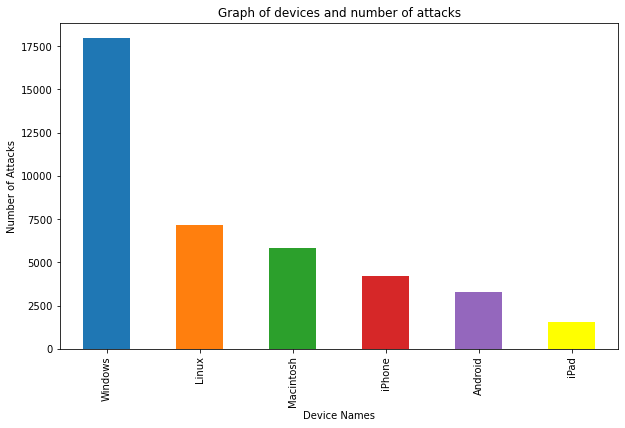

In [43]:
device_counts = cyber_df['device_names'].value_counts()

plt.figure(figsize=(10,6))

device_counts.plot.bar(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', "yellow"])

plt.xlabel("Device Names") 
plt.ylabel("Number of Attacks")

plt.title("Graph of devices and number of attacks")
plt.show;

Windows has the highest number of cyber attacks, increasing its security will help reduce the number

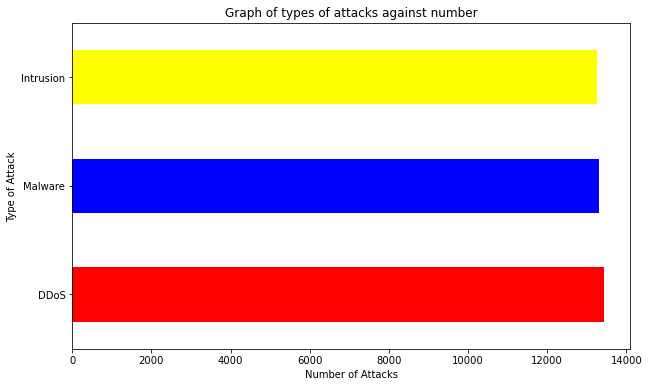

In [46]:

attack_series = cyber_df["Attack Type"].value_counts()


plt.figure(figsize=(10,6))

attack_series.plot.barh(color=['red', 'blue', "yellow"])

plt.ylabel("Type of Attack") 
plt.xlabel("Number of Attacks")

plt.title("Graph of types of attacks against number")
plt.show;


